In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# !!!
y = y.reshape(-11,1)
y.shape

(506, 1)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

# store cost during optimization
train_costs = [[], []] 
# 
print_step = 50

### Hyperparameters

In [7]:
learning_rate = 0.025
num_epochs = 100

### Define the model

In [8]:
model = Sequential()

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
#       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#       bias_constraint=None, **kwargs)
# `Dense` implements the operation:
# `output = activation(dot(input, kernel) + bias)`
model.add(Dense(output_dim, input_dim = input_dim, kernel_initializer='normal')) # activation = None for regression

### Compile model

In [9]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = learning_rate))

In [10]:
# number of parameters = num. features + bias
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [11]:
history = model.fit(X_train, y_train, epochs = num_epochs)

Epoch 1/100
404/404 [==============================] - 0s - loss: 578.7261     
Epoch 2/100
404/404 [==============================] - 0s - loss: 546.2736     
Epoch 3/100
404/404 [==============================] - 0s - loss: 522.5528     
Epoch 4/100
404/404 [==============================] - 0s - loss: 502.9437     
Epoch 5/100
404/404 [==============================] - 0s - loss: 486.9157     
Epoch 6/100
404/404 [==============================] - 0s - loss: 472.0503     
Epoch 7/100
404/404 [==============================] - 0s - loss: 456.5568     
Epoch 8/100
404/404 [==============================] - 0s - loss: 441.9739     
Epoch 9/100
404/404 [==============================] - 0s - loss: 428.3590     
Epoch 10/100
404/404 [==============================] - 0s - loss: 414.4461     
Epoch 11/100
404/404 [==============================] - 0s - loss: 401.3366     
Epoch 12/100
404/404 [==============================] - 0s - loss: 388.8797     
Epoch 13/100
404/404 [===============

### get model weights

In [13]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print("\n\nTraining cost: ", "{:.4f}".format(train_score))
print("\nTest cost: ", "{:.4f}".format(test_score))

 32/102 [========>.....................] - ETA: 0s

Training cost:  25.2243

Test cost:  40.9202


In [14]:
model.get_weights()

[array([[-0.85590136],
        [ 0.87851989],
        [-0.29941276],
        [ 0.65005368],
        [-1.43729305],
        [ 2.73533368],
        [-0.21408181],
        [-2.63178706],
        [ 1.18384433],
        [-0.95020086],
        [-2.20379806],
        [ 0.72874272],
        [-3.46722317]], dtype=float32), array([ 20.21844864], dtype=float32)]

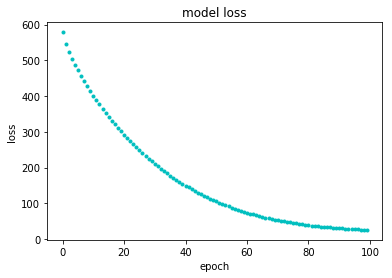

In [20]:
plt.plot(history.history['loss'], 'c.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Get predictions

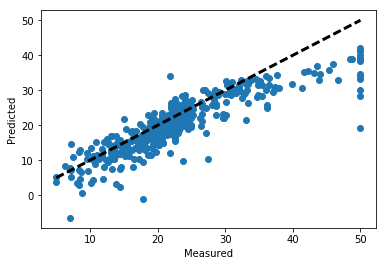

In [15]:
pred_train = model.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

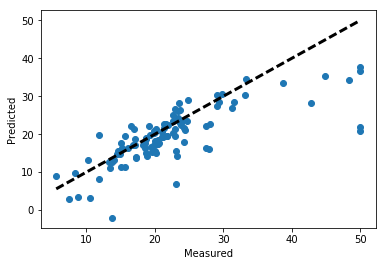

In [16]:
pred_test = model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()